In [1]:
# Import Python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Render plotting automatically
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn-darkgrid')

In [3]:
# Import Neural Network library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam 

In [4]:
#load the data
df = pd.read_csv('AData.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-01,30.6250,32.2500,30.25000,30.2500,30.2500,8156400
1,2000-08-02,30.2500,32.0000,30.21875,30.8125,30.8125,4952900
2,2000-08-03,29.4375,31.7500,29.31250,31.5000,31.5000,5144100
3,2000-08-04,31.9375,34.1875,31.50000,32.5000,32.5000,4871100
4,2000-08-07,32.0000,34.2500,31.62500,33.8125,33.8125,4403100


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5027,2020-07-27,3062.00000,3098.000000,3015.77002,3055.209961,3055.209961,4170500
5028,2020-07-28,3054.27002,3077.090088,2995.76001,3000.330078,3000.330078,3126700
5029,2020-07-29,3030.98999,3039.159912,2996.77002,3033.530029,3033.530029,2974100
5030,2020-07-30,3014.00000,3092.000000,3005.00000,3051.879883,3051.879883,6128300
5031,2020-07-31,3244.00000,3246.820068,3151.00000,3164.679932,3164.679932,8085500


In [6]:
#Data Quality Check & Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5032 entries, 0 to 5031
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5032 non-null   object 
 1   Open       5032 non-null   float64
 2   High       5032 non-null   float64
 3   Low        5032 non-null   float64
 4   Close      5032 non-null   float64
 5   Adj Close  5032 non-null   float64
 6   Volume     5032 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 275.3+ KB


In [7]:
df = df.set_index('Date')[['Close']].tail(500)

In [8]:
df = df.set_index(pd.to_datetime(df.index))
df.head()

,Close
Date,
2018-08-07,1862.479980
2018-08-08,1886.520020
2018-08-09,1898.520020
2018-08-10,1886.300049
2018-08-13,1896.199951


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2018-08-07 to 2020-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   500 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


In [10]:
df.describe()

,Close
count,500.000000
mean,1937.435061
std,345.745602
min,1343.959961
25%,1752.725036
50%,1847.109985
75%,1973.009979
max,3200.000000


In [11]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df.head() 

,Close
Date,
2018-08-07,0.279369
2018-08-08,0.292321
2018-08-09,0.298787
2018-08-10,0.292203
2018-08-13,0.297537


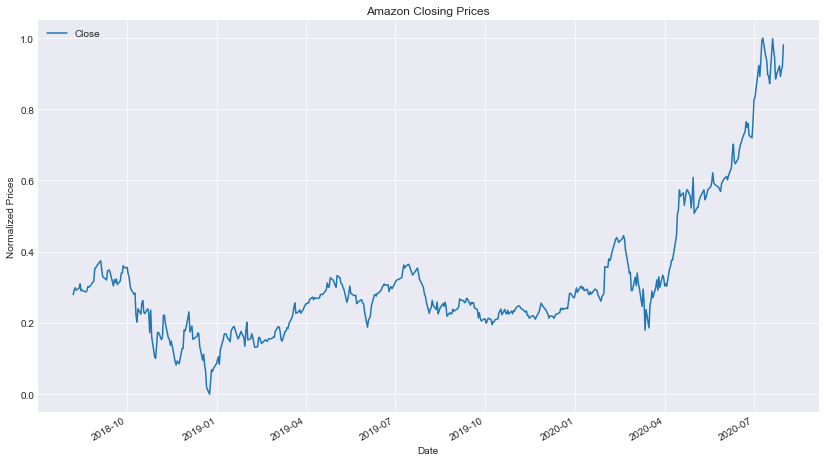

In [12]:
df.plot(figsize=(14,8))
plt.title('Amazon Closing Prices')
plt.ylabel('Normalized Prices')
plt.show()

In [13]:
# split_sequence splits the datasets into training and test sets.
def split_sequence(seq, n_steps_in, n_steps_out):
    X,y = [],[]

    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [14]:
#  visualize_results functions helps visualize the neural network created.

def visualize_results(results):
    history = results.history
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'], label='test')
    plt.plot(history['loss'], label='train')
    plt.legend(['test', 'train'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'], label='test')
    plt.plot(history['accuracy'], label = 'train')
    plt.legend(['test', 'train'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [15]:
# Use the split_sequence function from the helper functions above to split the dataset.
n_per_in = 30
n_per_out = 7
n_features = 1 
X,y = split_sequence(list(df.Close), n_per_in, n_per_out)
print(X.shape)
X = X.reshape(X.shape[0], X.shape[1], n_features)
print(X.shape)

(464, 30)
(464, 30, 1)


In [16]:
#Construct Neural Network - Fit Model
model = Sequential()
model.add(LSTM(30, activation='softsign', return_sequences=True, 
               input_shape=(n_per_in, n_features)))
model.add(LSTM(20, activation='softsign', return_sequences=True))
model.add(LSTM(20, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign'))
model.add(Dense(n_per_out))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 30, 20)            4080      
                                                                 
 lstm_2 (LSTM)               (None, 30, 20)            3280      
                                                                 
 lstm_3 (LSTM)               (None, 30, 10)            1240      
                                                                 
 lstm_4 (LSTM)               (None, 30, 10)            840       
                                                                 
 lstm_5 (LSTM)               (None, 30, 10)            840       
                                                                 
 lstm_6 (LSTM)               (None, 10)                8

In [17]:
#compile the  model
opt = Adam(lr = 0.00001)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

C:\Users\harik\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
#train the model
result = model.fit(X,y, epochs=150, batch_size=30, validation_split=0.1)

Epoch 1/150
14/14 [==============================] - 9s 113ms/step - loss: 0.0674 - accuracy: 0.0887 - val_loss: 0.5065 - val_accuracy: 0.0851
Epoch 2/150
14/14 [==============================] - 1s 66ms/step - loss: 0.0409 - accuracy: 0.0935 - val_loss: 0.3928 - val_accuracy: 0.0851
Epoch 3/150
14/14 [==============================] - 1s 47ms/step - loss: 0.0260 - accuracy: 0.0935 - val_loss: 0.3226 - val_accuracy: 0.0851
Epoch 4/150
14/14 [==============================] - 1s 48ms/step - loss: 0.0175 - accuracy: 0.0935 - val_loss: 0.3041 - val_accuracy: 0.0851
Epoch 5/150
14/14 [==============================] - 1s 48ms/step - loss: 0.0133 - accuracy: 0.0935 - val_loss: 0.2763 - val_accuracy: 0.0851
Epoch 6/150
14/14 [==============================] - 1s 53ms/step - loss: 0.0119 - accuracy: 0.0935 - val_loss: 0.2773 - val_accuracy: 0.0851
Epoch 7/150
14/14 [==============================] - 1s 48ms/step - loss: 0.0112 - accuracy: 0.1319 - val_loss: 0.2680 - val_accuracy: 0.3830
Epoch

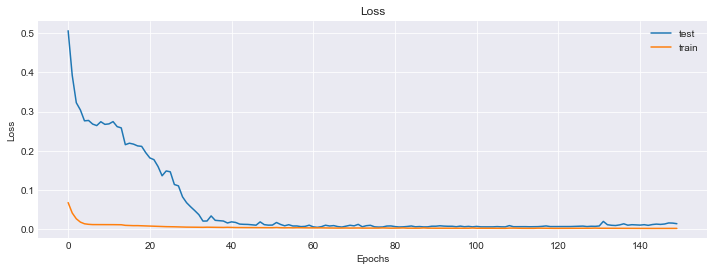

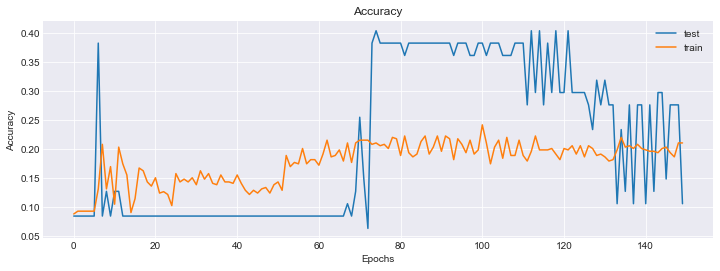

In [19]:
#Loss & Accuracy Visualization
visualize_results(result)

predicted [[2977.179492724472], [3018.168055468716], [2919.5900011817707], [3011.2164856772415], [2934.261013927389], [2889.8888752315197], [2923.780502194411]]
actuals [[2986.550049], [3008.909912], [3055.209961], [3000.330078], [3033.530029], [3051.879883], [3164.679932]]


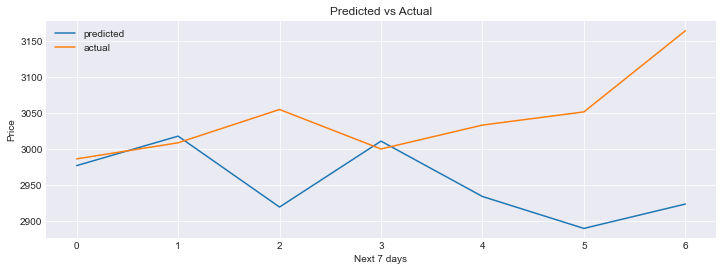

In [20]:
#Model Validation
plt.figure(figsize=(12,4))

yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()
actual = scaler.inverse_transform(y[-1].reshape(-1,1)).tolist()
print('predicted', yhat)
plt.plot(yhat, label='predicted')
print('actuals', actual)
plt.plot(actual, label='actual')
plt.title('Predicted vs Actual')
plt.ylabel('Price')
plt.xlabel('Next 7 days')
plt.legend()
plt.show()

                  Close
2020-07-31  3068.748561
2020-08-01  3113.886582
2020-08-02  3003.396149
2020-08-03  3099.456518
2020-08-04  3010.940246
2020-08-05  2954.068181
2020-08-06  2998.397285


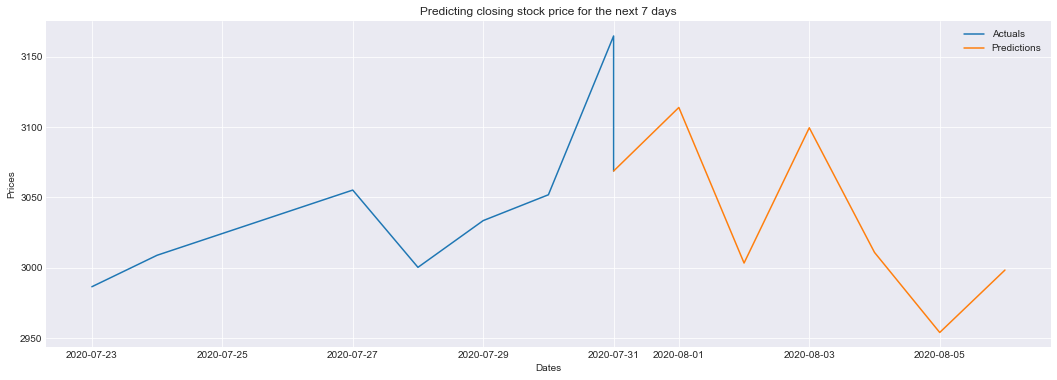

In [21]:
#future prediction
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1,n_per_in, n_features)).tolist()[0]
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat),
        freq='D'),columns=df.columns)
print(preds)
periods = 7
actual = pd.DataFrame(scaler.inverse_transform(df[['Close']].tail(periods)), 
        index = df.Close.tail(periods).index, columns= df.columns).append(preds.head(1))

plt.figure(figsize=(18,6))
plt.plot(actual, label='Actuals')
plt.plot(preds, label='Predictions')
plt.title(f'Predicting closing stock price for the next {len(yhat)} days')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

conclusion is The machine learning model predicts an increase in stock prices. From the prediction above, we see that LSTM networks are able to predict future stock prices. According to Forbes.com, despite the Coronavirus pandemic, Amazon has benefited millions since people turned to online marketplaces for essential requirements.